# Cotton Plant Disease Classification

#### Import necessary libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow.keras.applications import MobileNetV3Small

#### Collect Image Paths for Each Category

In [2]:
from glob import glob

In [3]:
pwd

'C:\\Users\\Pakistan\\Desktop\\NIVEDITHA\\Deep learning course notes\\Deep learning course notes\\8. Transfer learning\\Cotton Plant Disease Dataset'

In [4]:
aphids = glob('Cotton plant/Cotton plant/Aphids/*.jpg')
army_worm = glob('Cotton plant/Cotton plant/Army worm/*.jpg')
bacterial_blight = glob('Cotton plant/Cotton plant/Bacterial Blight/*.jpg')
healthy = glob('Cotton plant/Cotton plant/Healthy/*.jpg')
powdery_mildew = glob('Cotton plant/Cotton plant/Powdery Mildew/*.jpg')
target_spot = glob('Cotton plant/Cotton plant/Target spot/*.jpg')

In [5]:
aphids

['Cotton plant/Cotton plant/Aphids\\1.jpg',
 'Cotton plant/Cotton plant/Aphids\\10.jpg',
 'Cotton plant/Cotton plant/Aphids\\11.jpg',
 'Cotton plant/Cotton plant/Aphids\\12.jpg',
 'Cotton plant/Cotton plant/Aphids\\13.jpg',
 'Cotton plant/Cotton plant/Aphids\\14.jpg',
 'Cotton plant/Cotton plant/Aphids\\15.jpg',
 'Cotton plant/Cotton plant/Aphids\\16.jpg',
 'Cotton plant/Cotton plant/Aphids\\17.jpg',
 'Cotton plant/Cotton plant/Aphids\\18.jpg',
 'Cotton plant/Cotton plant/Aphids\\19.jpg',
 'Cotton plant/Cotton plant/Aphids\\2.jpg',
 'Cotton plant/Cotton plant/Aphids\\20.jpg',
 'Cotton plant/Cotton plant/Aphids\\21.jpg',
 'Cotton plant/Cotton plant/Aphids\\22.jpg',
 'Cotton plant/Cotton plant/Aphids\\23.jpg',
 'Cotton plant/Cotton plant/Aphids\\24.jpg',
 'Cotton plant/Cotton plant/Aphids\\25.jpg',
 'Cotton plant/Cotton plant/Aphids\\26.jpg',
 'Cotton plant/Cotton plant/Aphids\\27.jpg',
 'Cotton plant/Cotton plant/Aphids\\28.jpg',
 'Cotton plant/Cotton plant/Aphids\\29.jpg',
 'Cotton pla

#### Define Classes and Corresponding Labels

In [6]:
classes = {0:'aphids', 1:'army_worm', 2:'bacterial_blight', 3:'healthy', 4:'powdery_mildew', 5:'target_spot'}

#### Load and Label Images for Each Category

In [7]:
image = []
label = [] 

for i in aphids: 
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in army_worm: 
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in bacterial_blight: 
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in healthy: 
    img = plt.imread(i)
    image.append(img)
    label.append(3)

for i in powdery_mildew: 
    img = plt.imread(i)
    image.append(img)
    label.append(4)

for i in target_spot: 
    img = plt.imread(i)
    image.append(img)
    label.append(5)


#### Plot first few images

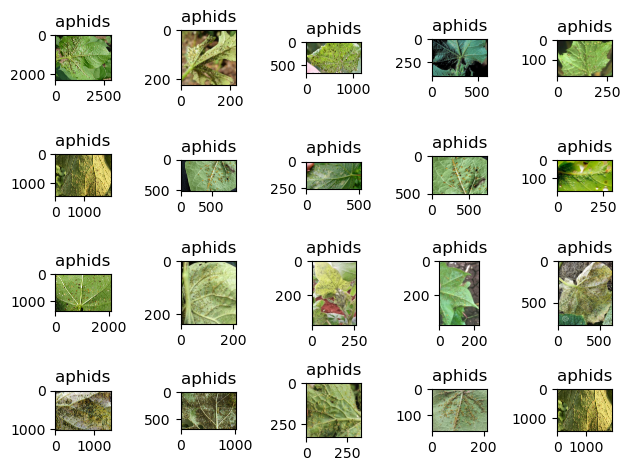

In [8]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])
    plt.title(classes[label[i]])
    plt.tight_layout()

#### Shuffle the images

In [9]:
from sklearn.utils import shuffle

In [10]:
image, label = shuffle(image, label)

#### Plot some of the image after the shuffle

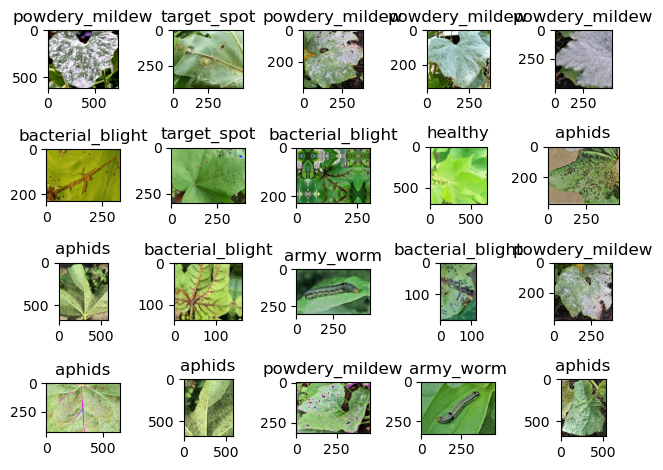

In [11]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])
    plt.title(classes[label[i]])
plt.tight_layout()

#### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [12]:
from skimage.transform import resize

In [13]:
X = []

for i in image:
    X.append(resize(i,(224,224,3)))

#### Plot some of the images after resizing

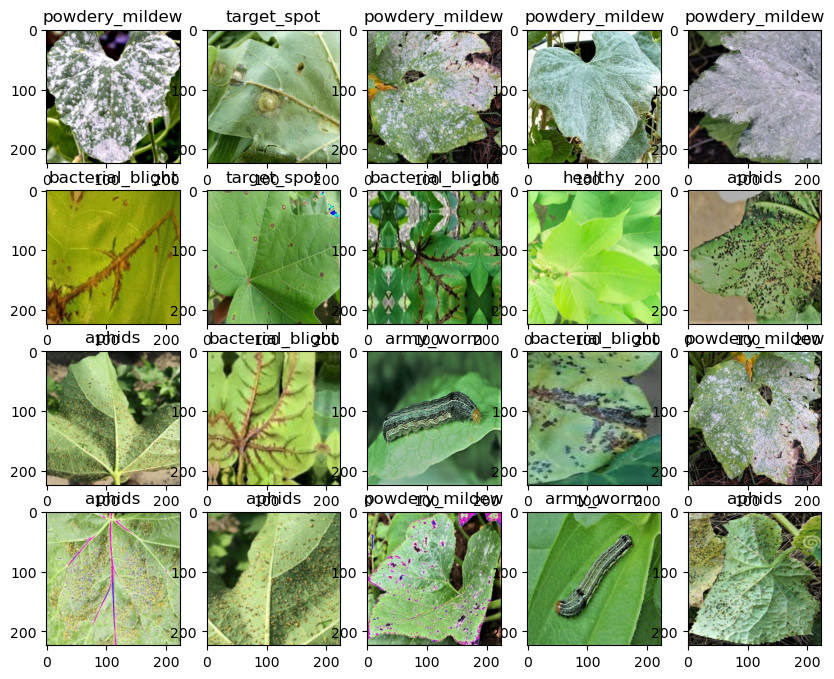

In [14]:
plt.figure(figsize=(10, 8))
for i in range(20): 
    plt.subplot(4,5, i+1)
    plt.imshow(X[i])
    plt.title(classes[label[i]])

#### Convert image and label datatypes from list to Numpy array

In [15]:
X = np.array(X)
y = np.array(label)

#### Convert Images and Labels to NumPy Arrays

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 100)

#### MobileNetV2 Pre-trained Feature Extractor Model URL

In [18]:
pre_trained = MobileNetV3Small(weights='imagenet',
                input_shape=(224,224,3),
                include_top=False)

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
pre_trained.trainable = False

#### Load Pre-trained MobileNetV2 Feature Extractor Model

#### Define Number of Output Classes

In [20]:
num_of_classes = 6

#### Instantiate MobileNetV2 without Top Layer as Feature Extractor

#### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [21]:
from tensorflow.keras import Sequential, layers

In [22]:
model = Sequential([
    pre_trained,
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(num_of_classes, activation = 'softmax')
])

#### Compile Transfer Learning Model

In [23]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,806,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,746,520 (10.48 MB)

 Trainable params: 1,807,400 (6.89 MB)

 Non-trainable params: 939,120 (3.58 MB)

#### Train the model

In [25]:
model.fit(Xtrain, ytrain, epochs=20, validation_split=0.2)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 36s 408ms/step - accuracy: 0.1692 - loss: 2.2055 - val_accuracy: 0.2782 - val_loss: 1.7716
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.1982 - loss: 1.7957 - val_accuracy: 0.1496 - val_loss: 1.7941
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 344ms/step - accuracy: 0.1837 - loss: 1.7914 - val_accuracy: 0.1496 - val_loss: 1.7943
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 339ms/step - accuracy: 0.1904 - loss: 1.7909 - val_accuracy: 0.1496 - val_loss: 1.7945
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 352ms/step - accuracy: 0.1855 - loss: 1.7902 - val_accuracy: 0.1496 - val_loss: 1.7946
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 347ms/step - accuracy: 0.1644 - loss: 1.7919 - val_accuracy: 0.1496 - val_loss: 1.7948
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 338ms/step - accuracy: 0.1894 - loss: 1.7909 - val_accuracy: 0.1496 - val_loss: 1.7949
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 341ms/step - accuracy: 0.1787 - loss: 1.7907 - val_accu

#### Model Prediction on Test Data

In [26]:
ypred = model.predict(Xtest)

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step


In [27]:
ypred = [np.argmax(i) for i in ypred]

#### Calculate Accuracy Score

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
accuracy_score(ytest,ypred)

0.15336134453781514

#### 
Visualise confusion matrix on a heatmap

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

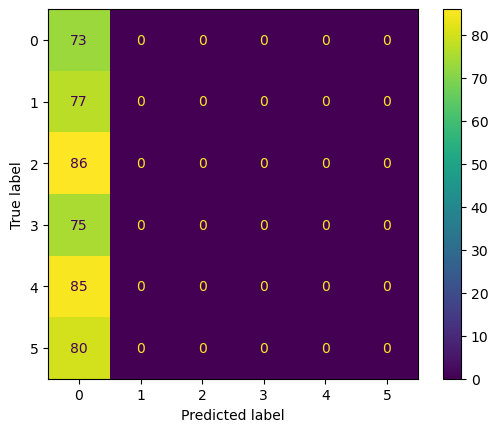

In [31]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred)

#### Classification Report

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.15      1.00      0.27        73
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        86
           3       0.00      0.00      0.00        75
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        80

    accuracy                           0.15       476
   macro avg       0.03      0.17      0.04       476
weighted avg       0.02      0.15      0.04       476



C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
